In [2]:
# Set paths (Currently, need to run this cell every ipynb file...)
# You can add these paths to PYTHONPATH in .zshrc/.zprofile (.bashrc/.bash_profile)
# PYTHONPATH='/Users/masunaga/work/python_git/lib_open/projects/Hisaki_py:$PYTHONPATH'
# export PYTHONPATH

import sys
# Revise the path as nessesary for your environment
hskpypath = '/Users/tsuch/VSCode/python/Hisaki/Hisaki_Py/'
if hskpypath not in sys.path:
    sys.path.append(hskpypath)

# Revise the path as nessesary for your environment
mypypath = '/Users/tsuch/VSCode/python/Hisaki/'
if mypypath not in sys.path:
    sys.path.append(mypypath)

In [3]:
import hskinit  ## Run hskinit

# Download data  (L2 prime)

In [4]:
from hskpy.general.data import download_data_l2p, get_fname

In [5]:
download_data_l2p('jupiter', '20140110', vr='01_00')

File exeuv_jupiter_20140110_lv02p_LT00-24_dt00106_vr01_00.fits exists in the local computer.


# Find data (L2 prime)

In [6]:
fname = get_fname('jupiter', '20140110', lv='l2p', vr='01_00', fullpath=True)
fname

'/Users/Shared/data/hisaki/l2prime/jupiter/jupiter/2014/exeuv_jupiter_20140110_lv02p_LT00-24_dt00106_vr01_00.fits'

In [7]:
import matplotlib.colors as colors  # import it to display in logscale
import matplotlib.pyplot as plt  # import pyplot module
from hskpy.general.data import fitsopen, get_img, get_xaxis, get_yaxis, get_labels

In [8]:
hdul_im = fitsopen(fname)
n_ext=1

---- Opened exeuv_jupiter_20140110_lv02p_LT00-24_dt00106_vr01_00.fits ----
---- Make sure that the fits data should be closed eventually. ----


EXTENSION=                     / compiled at Apr 22 2015 09:35:11 (JST)          [astropy.io.fits.card]


Text(0.5, 1.0, 'Integration time [min] 330')

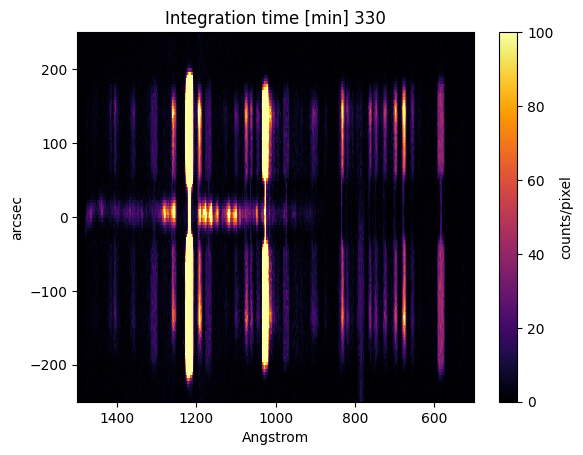

In [9]:
img = get_img(hdul_im, ext=n_ext)
INT_TIME = hdul_im[n_ext].header['INT_TIME']

x_axis_im = get_xaxis(hdul_im, ext=n_ext)
y_axis_im = get_yaxis(hdul_im, ext=n_ext)
x_label_im, y_label_im, BUNITS_im = get_labels(hdul_im, ext=n_ext)

mesh = plt.pcolormesh(x_axis_im, y_axis_im, img,
                      cmap='inferno', vmin=0.0, vmax=100.0)
plt.colorbar(mesh, label=BUNITS_im)
plt.xlim(1500.0, 500.0)  # set xrange (in wavelength)
plt.ylim(-250.0, 250.0)  # set yrange (in bin num)
plt.xlabel(x_label_im)
plt.ylabel(y_label_im)
plt.title('Integration time [min] '+str(INT_TIME))

# Calibration tables (L2 prime)

In [10]:
#l2p_cal_file = '/Users/Shared/HISAKI/cal/calib_l2p_v1.1.fits'

#hdul_cal = fitsopen(l2p_cal_file)
#cal_tbl_n = get_img(hdul_cal, ext=1)
#cal_tbl_s = get_img(hdul_cal, ext=2)

#x_axis = get_xaxis(hdul_cal, ext=1)
#y_axis = get_yaxis(hdul_cal, ext=1)

from hskpy.general.calib import get_cal_ver
x_axis, y_axis, cal_tbl_n, cal_tbl_s = get_cal_ver(lv='l2p', vr='1.1')

EXTENSION=                                                                       [astropy.io.fits.card]


/var/folders/k5/4k14l1hs0vx239m2nhghyhr00000gn/T/ipykernel_10062/2219199022.py:24: RuntimeWarning: invalid value encountered in divide
  diff_map = (cal_tbl_n-cal_tbl_s)/(cal_tbl_n+cal_tbl_s) * 2.0 * 100.0


Text(0, 0.5, '[arcsec]')

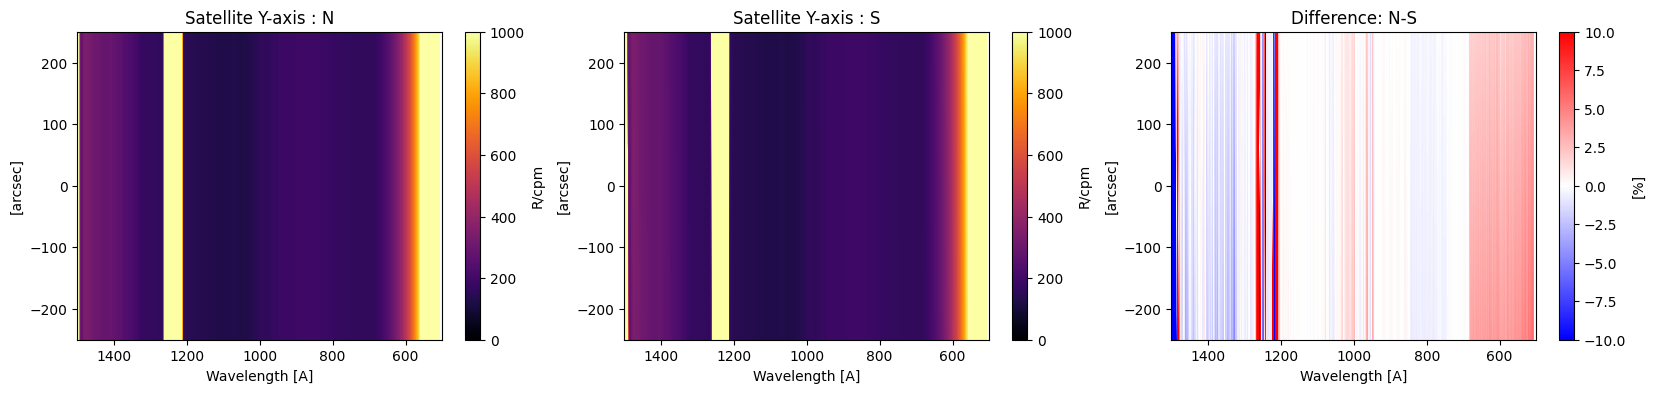

In [11]:
fig = plt.figure(figsize=[20,4])

plt.subplot(1,3,1)
mesh = plt.pcolormesh(x_axis, y_axis, cal_tbl_n,
                      cmap='inferno', vmin=0.0, vmax=1000.0)
plt.colorbar(mesh, label='R/cpm')
plt.xlim(1500.0, 500.0)  # set xrange (in wavelength)
plt.ylim(-250.0, 250.0)  # set yrange (in bin num)
plt.title('Satellite Y-axis : N')
plt.xlabel('Wavelength [A]')
plt.ylabel('[arcsec]')

plt.subplot(1, 3, 2)
mesh = plt.pcolormesh(x_axis, y_axis, cal_tbl_s,
                      cmap='inferno', vmin=0.0, vmax=1000.0)
plt.colorbar(mesh, label='R/cpm')
plt.xlim(1500.0, 500.0)  # set xrange (in wavelength)
plt.ylim(-250.0, 250.0)  # set yrange (in bin num)
plt.title('Satellite Y-axis : S')
plt.xlabel('Wavelength [A]')
plt.ylabel('[arcsec]')

plt.subplot(1, 3, 3)
diff_map = (cal_tbl_n-cal_tbl_s)/(cal_tbl_n+cal_tbl_s) * 2.0 * 100.0
mesh = plt.pcolormesh(x_axis, y_axis, diff_map,
                      cmap='bwr', vmin=-10.0, vmax=10.0)
plt.colorbar(mesh, label='[%]')
plt.xlim(1500.0, 500.0)  # set xrange (in wavelength)
plt.ylim(-250.0, 250.0)  # set yrange (in bin num)
plt.title('Difference: N-S')
plt.xlabel('Wavelength [A]')
plt.ylabel('[arcsec]')

# Apply calibration table

Text(0.5, 1.0, 'Integration time [min] 330')

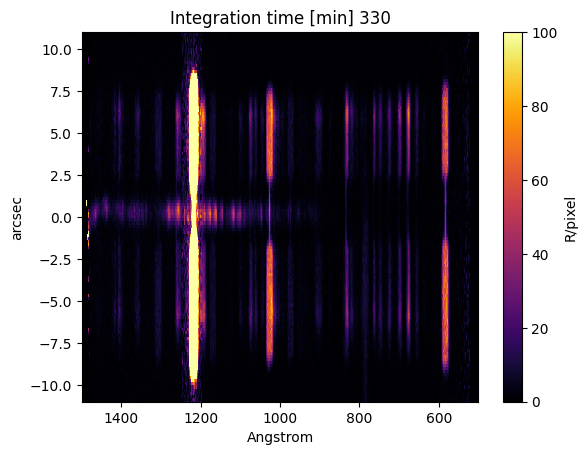

In [12]:
# Find satellite y-axis direction (North or South)
if n_ext == 1:
    y_pol = hdul_im[n_ext+1].header['Y_POL']
else:
    y_pol = hdul_im[n_ext].header['Y_POL']

# Select calibration table
if y_pol == 0:
    cal_tbl = cal_tbl_n
else:
    cal_tbl = cal_tbl_s

# Apply calibration table
img_ucal = img/INT_TIME
img_cal = img_ucal * cal_tbl  # counts/min/pixel -> R/pixel

APPDIA = float(hdul_im[n_ext].header['APPDIA'])
y_axis_rj = y_axis_im / (APPDIA * 0.5)

# Plot calibrated image
mesh = plt.pcolormesh(x_axis_im, y_axis_rj, img_cal,
                      cmap='inferno', vmin=0.0, vmax=100.0)
plt.colorbar(mesh, label='R/pixel')
plt.xlim(1500.0, 500.0)  # set xrange (in wavelength)
plt.ylim(-11.0, 11.0)  # set yrange (in bin num)
plt.xlabel(x_label_im)
plt.ylabel(y_label_im)
plt.title('Integration time [min] ' + str(INT_TIME))

# Plot Y-slice

Text(0.5, 1.0, 'SIII 680A')

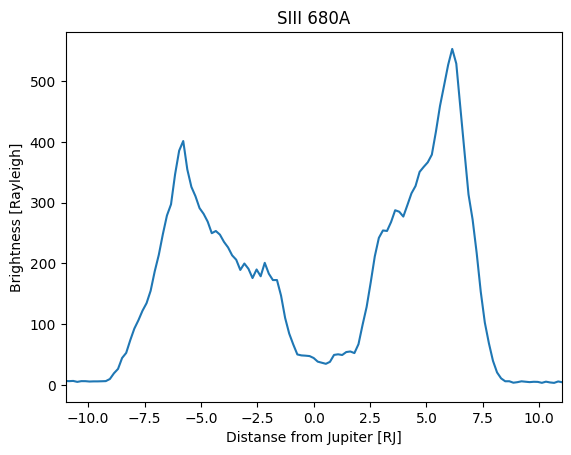

In [13]:
import numpy as np
from hskpy.general.data import get_xslice, get_yslice

index = np.where((x_axis_im > 670.0) & (x_axis_im < 690.0))

xlim=(np.min(index), np.max(index))
yslice_680 = get_yslice(img_cal, xlim)

plt.plot(y_axis_rj, yslice_680)
plt.xlim(-11.0,11.0)
plt.xlabel("Distanse from Jupiter [RJ]")
plt.ylabel("Brightness [Rayleigh]")
plt.title("SIII 680A")

In [14]:
def peak_search(x_data, y_data, y_lim_low):

    n = len(x_data)

    ret_i = []
    ret_x = []
    ret_y = []
    for i in range(1, n-1):
        if ((y_data[i] > y_lim_low) & (y_data[i] >= y_data[i-1]) & (y_data[i] >= y_data[i+1])):
            ret_i.append(i)
            ret_x.append(x_data[i])
            ret_y.append(y_data[i])

    return ret_i, ret_x, ret_y

Text(0.5, 1.0, 'SIII 680A')

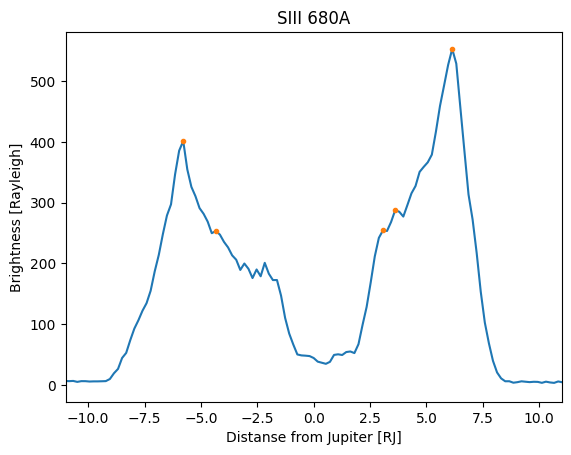

In [15]:
pk_i, pk_x, pk_y = peak_search(y_axis_rj, yslice_680, 250.0)
#print(ret_pk)

plt.plot(y_axis_rj, yslice_680)
plt.plot(pk_x, pk_y, '.')
plt.xlim(-11.0, 11.0)
plt.xlabel("Distanse from Jupiter [RJ]")
plt.ylabel("Brightness [Rayleigh]")
plt.title("SIII 680A")

# Plot X-slice

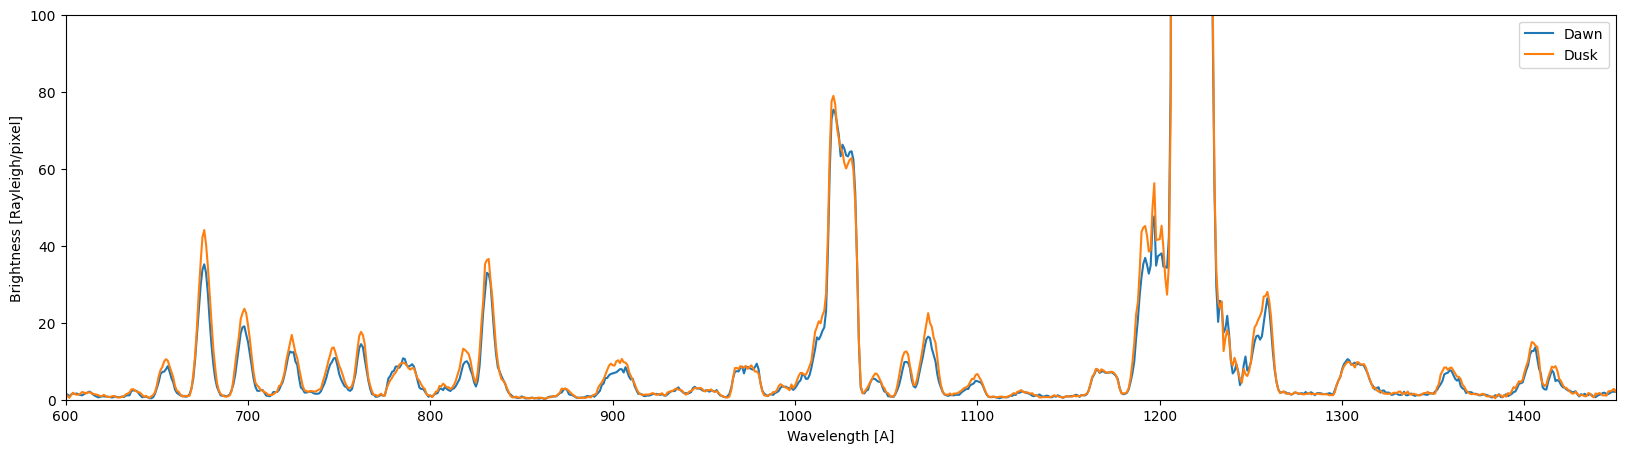

In [16]:
width = 1.0 # [RJ]
index_dusk = np.where(
    (y_axis_rj > pk_x[0]-width) & (y_axis_rj < pk_x[0]+width))
index_dawn = np.where(
    (y_axis_rj > pk_x[1]-width) & (y_axis_rj < pk_x[1]+width))

# brightness at dawn (peak position +/- 1 RJ)
ylim = (np.min(index_dawn), np.max(index_dawn))
spec_dawn = get_xslice(img_cal, ylim, mean=True)

# brightness at dusk (peak position +/- 1 RJ)
ylim = (np.min(index_dusk), np.max(index_dusk))
spec_dusk = get_xslice(img_cal, ylim, mean=True)

fig = plt.figure(figsize=(20.0,5.0))
plt.plot(x_axis_im, spec_dawn, label='Dawn')
plt.plot(x_axis_im, spec_dusk, label='Dusk')
plt.xlim(600.0, 1450.0)
plt.ylim(0.0, 100.0)
plt.xlabel("Wavelength [A]")
plt.ylabel("Brightness [Rayleigh/pixel]")
plt.legend()


In [17]:
hdul_im.close()
